![A soccer pitch for an international match.](soccer-pitch.jpg)

I am working as a sports journalist at a major online sports media company, specializing in football analysis and reporting. I've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but I'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

I create two datasets containing the results of every official men's and women's international football match since the 19th century, which I scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question I am trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

I assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

{'p_val': 0.0051961448009743005, 'result': 'reject'}
{'n_men': 384, 'n_women': 200, 'mean_men': 2.5130208333333335, 'mean_women': 2.98}


/var/folders/7l/q0knkmpx5qn9jqdv5m74095c0000gn/T/ipykernel_37703/860734188.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([men_wc["total_goals"], women_wc["total_goals"]],


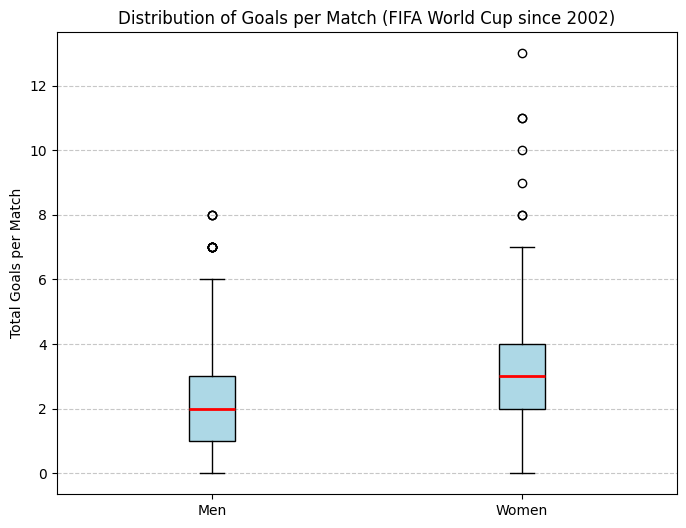

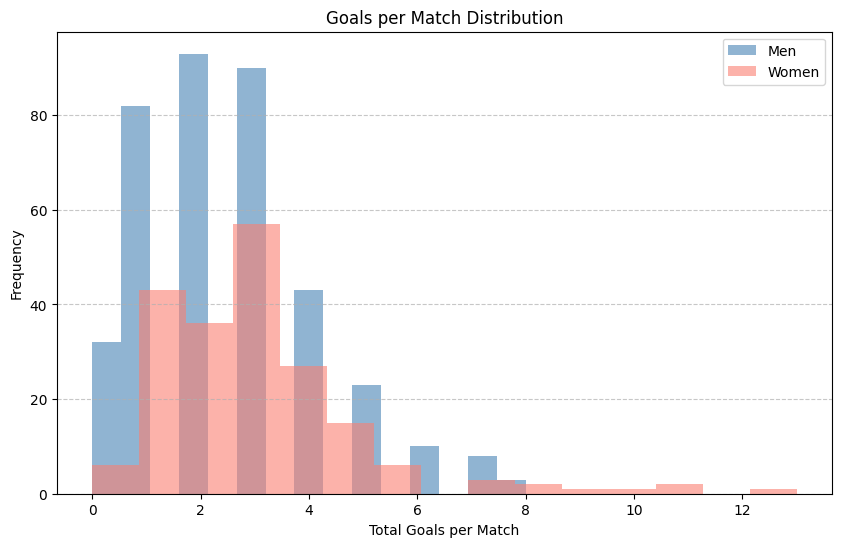

In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Load data ---
men = pd.read_csv("men_results.csv", parse_dates=["date"])
women = pd.read_csv("women_results.csv", parse_dates=["date"])

# --- Filter FIFA World Cup matches since 2002-01-01 (inclusive) ---
men_wc = men[(men["tournament"] == "FIFA World Cup") & (men["date"] >= "2002-01-01")].copy()
women_wc = women[(women["tournament"] == "FIFA World Cup") & (women["date"] >= "2002-01-01")].copy()

# --- Total goals per match ---
men_wc = men_wc.assign(total_goals = men_wc["home_score"] + men_wc["away_score"])
women_wc = women_wc.assign(total_goals = women_wc["home_score"] + women_wc["away_score"])

# --- Hypothesis test (Welch’s t-test, two-sided) ---
t_stat, p_val = ttest_ind(men_wc["total_goals"], women_wc["total_goals"], equal_var=False)

alpha = 0.10
result = "reject" if p_val < alpha else "fail to reject"

result_dict = {"p_val": float(p_val), "result": result}
print(result_dict)

# (Optional sanity checks; won't affect result_dict)
print({
    "n_men": int(men_wc.shape[0]),
    "n_women": int(women_wc.shape[0]),
    "mean_men": float(men_wc["total_goals"].mean()),
    "mean_women": float(women_wc["total_goals"].mean())
})

# --- Visualization: Boxplot of goals per match ---
plt.figure(figsize=(8,6))
plt.boxplot([men_wc["total_goals"], women_wc["total_goals"]],
            labels=["Men", "Women"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue"),
            medianprops=dict(color="red", linewidth=2))
plt.title("Distribution of Goals per Match (FIFA World Cup since 2002)")
plt.ylabel("Total Goals per Match")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Visualization: Histogram (side-by-side) ---
plt.figure(figsize=(10,6))
plt.hist(men_wc["total_goals"], bins=15, alpha=0.6, label="Men", color="steelblue")
plt.hist(women_wc["total_goals"], bins=15, alpha=0.6, label="Women", color="salmon")
plt.title("Goals per Match Distribution")
plt.xlabel("Total Goals per Match")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
